### 加载数据

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_excel('../data/DM/实验3data.xlsx')
data.head()

,ID,套餐金额,额外通话时长,额外流量,改变行为,服务合约,关联购买,集团用户,使用月数,流失用户
0,2,1,121.666667,-21.141117,0,0,0,0,25,0
1,4,1,241.500000,-288.341254,0,1,0,1,25,0
2,5,1,1629.666667,-23.655505,0,0,0,1,25,0
3,6,1,182.000000,-115.863584,0,1,0,1,25,0
4,7,1,196.333333,221.294207,0,1,0,1,23,0


In [2]:
data.shape

(4028, 10)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4028 entries, 0 to 4027
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      4028 non-null   int64  
 1   套餐金额    4028 non-null   int64  
 2   额外通话时长  4028 non-null   float64
 3   额外流量    4028 non-null   float64
 4   改变行为    4028 non-null   int64  
 5   服务合约    4028 non-null   int64  
 6   关联购买    4028 non-null   int64  
 7   集团用户    4028 non-null   int64  
 8   使用月数    4028 non-null   int64  
 9   流失用户    4028 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 314.8 KB


In [4]:
data.describe()

,ID,套餐金额,额外通话时长,额外流量,改变行为,服务合约,关联购买,集团用户,使用月数,流失用户
count,4028.000000,4028.000000,4028.000000,4028.000000,4028.000000,4028.000000,4028.000000,4028.000000,4028.000000,4028.000000
mean,2491.960526,1.057597,258.311184,-70.557921,0.021599,0.246773,0.048659,0.220953,14.794439,0.781033
std,1438.093112,0.258281,723.827045,269.189165,0.145388,0.431187,0.282097,0.414941,6.560861,0.413598
min,2.000000,1.000000,-2828.333333,-2189.875986,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,1245.750000,1.000000,-128.258333,-73.828702,0.000000,0.000000,0.000000,0.000000,13.000000,1.000000
50%,2482.500000,1.000000,15.000000,-59.648828,0.000000,0.000000,0.000000,0.000000,13.000000,1.000000
75%,3741.250000,1.000000,338.837500,-24.988628,0.000000,0.000000,0.000000,0.000000,19.000000,1.000000
max,4975.000000,3.000000,4314.000000,2568.704293,1.000000,1.000000,2.000000,1.000000,25.000000,1.000000


In [5]:
# 查看是否有重复ID的记录
sum(data['ID'].duplicated()) 

0

### 异常值处理

In [6]:
# 有无缺失值
data.isnull().sum() 
# 删除"ID"列
data = data.drop('ID', axis=1)

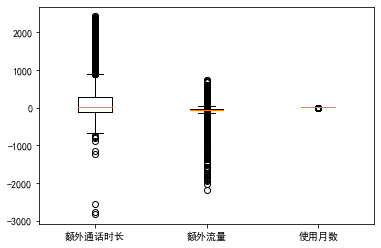

In [46]:
labels = ['额外通话时长', '额外流量', '使用月数']
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

plt.boxplot(data[labels], labels=labels)
plt.show()

In [8]:
# 3σ法
x1 = data[labels[0]] 
x2 = data[labels[1]]
x1_mean = x1.mean()
x1_std = x1.std()
x2_mean = x2.mean()
x2_std = x2.std()

# 中位数替代异常值
x1[x1 > x1_mean + 3 * x1_std] = x1.median()
data[labels[0]] = x1
x2[x2 > x2_mean + 3 * x2_std] = x2.median()
data[labels[1]] = x2

C:\Users\Gumiano\AppData\Local\Temp/ipykernel_11888/634947413.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x1[x1 > x1_mean + 3 * x1_std] = x1.median()
C:\Users\Gumiano\AppData\Local\Temp/ipykernel_11888/634947413.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x2[x2 > x2_mean + 3 * x2_std] = x2.median()


### 计算流失用户比例

流失用户比例: 0.7810327706057597


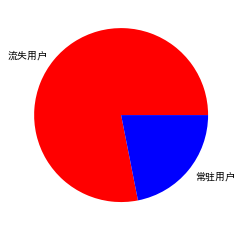

In [9]:
rate = sum(data['流失用户']) / len(data)
print('流失用户比例:', rate)
plt.pie(x=[rate, 1-rate], labels=['流失用户', '常驻用户'], colors=['r', 'b'])
plt.show()

### 分别统计

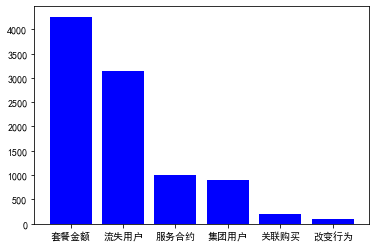

In [143]:
temp_data = data.drop(['额外通话时长', '额外流量', '使用月数'], axis=1).sum().sort_values(ascending=False)
plt.bar(x=temp_data.index, height=temp_data, color='blue')
plt.show()

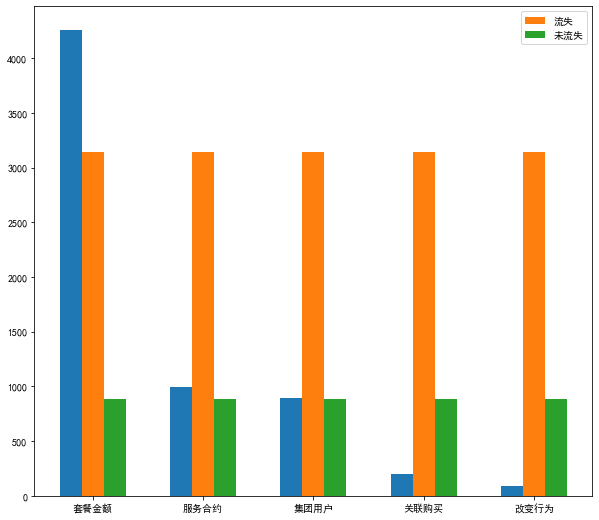

In [173]:
temp_data = data.drop(['额外通话时长', '额外流量', '使用月数', '流失用户'], axis=1).sum().sort_values(ascending=False)
length = len(temp_data)
loss = data['流失用户'].sum() 
un_loss = len(data) - loss
loss = [loss] * length
un_loss = [un_loss] * length

# 画图
bar_width = 0.2

index = temp_data.index
plt.figure(figsize=(10, 9))
plt.bar(x=np.arange(length), height=temp_data, width=bar_width)
plt.bar(x=np.arange(length) + bar_width, height=loss, width=bar_width, label='流失')
plt.bar(x=np.arange(length) + bar_width * 2, height=un_loss, width=bar_width, label='未流失')
plt.xticks(np.arange(length) + bar_width, index)
plt.legend()
plt.show()

### 逻辑回归

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV

X = data.drop('流失用户', axis=1)
y = data['流失用户']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)
X_train

In [12]:
Cs = [1, 10, 100, 1000] # 
logistic_model = LogisticRegressionCV(Cs=Cs, 
                     cv=5, 
                     penalty='l2',
                     solver='liblinear',
                     max_iter=1000,
                     class_weight='balanced',
                     n_jobs=4)
logistic_model.fit(X_train, y_train)

LogisticRegressionCV(Cs=[1, 10, 100, 1000], class_weight='balanced', cv=5,
                     max_iter=1000, n_jobs=4, solver='liblinear')

#### ROC曲线

auc:  0.9775252525252526


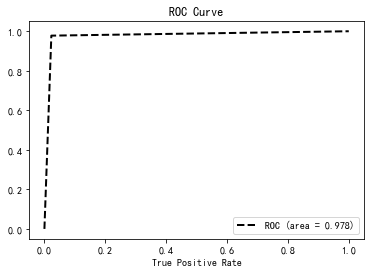

In [26]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
y_pred = logistic_model.predict(X_test)
auc_score = roc_auc_score(y_true=y_test, y_score=y_pred)
print( 'auc: ', auc_score )
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

plt.plot(fpr, tpr, 'k--', label=f'ROC (area = {auc_score:.3f})', lw=2)
plt.xlabel('False Positive Rate')
plt.xlabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

#### 模型预测

In [43]:
from sklearn.metrics import confusion_matrix
# 混淆矩阵
mat = confusion_matrix(y_test, y_pred)
print('confusion matrix: \n', mat)
print('accuracy: ', sum(mat.diagonal()) / mat.sum() )

confusion matrix: 
 [[172   4]
 [ 14 616]]
accuracy:  0.9776674937965261


### 决策树分类模型

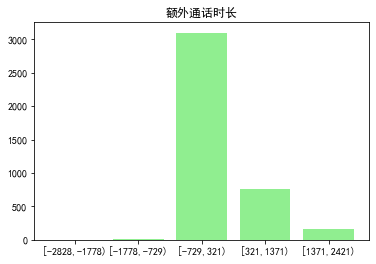

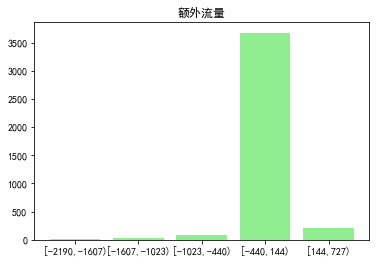

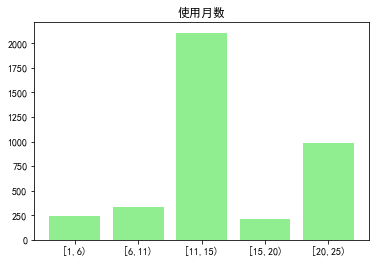

In [109]:
import math
import numpy as np  
temp_data = data[['额外通话时长', '额外流量', '使用月数']]

# 对一列数据进行分组
def get_bin_labels(interval, groups=5): 
    width = (interval[1] - interval[0]) / groups
    calc_bound = lambda i: interval[0] + i *width
    bins = [round(calc_bound(i)) for i in range(groups+1)]
    labels = [f'[{bins[i]},{bins[i+1]})' for i in range(len(bins)-1)]
    return (bins, labels)

names = temp_data.columns.tolist()

# 单列进行聚合
def get_one_column_aggregated(data, column_name, agg_func):
    if column_name in data.columns.tolist():
        data_copy = data[column_name].copy()
        tmp_bins, tmp_labels = get_bin_labels( interval=[data_copy.min(), data_copy.max()] )
        temp_groups = pd.cut(data_copy, tmp_bins, labels=tmp_labels)
        return data[column_name].groupby(by=temp_groups).aggregate(np.size)

def plot_bar_plots(data, agg_func):
    names = data.columns.tolist()
    for name in names:
        agged = get_one_column_aggregated(data, name, agg_func)
        plt.bar(agged.index, agged, color='lightgreen')
        plt.title(name)
        plt.show()

plot_bar_plots(temp_data, np.size)

In [122]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(class_weight='balanced',
                             criterion='gini',
                             max_depth=4)
X = data[['额外通话时长', '额外流量', '使用月数']]
y = data['流失用户']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('auc: ', roc_auc_score(y_test, y_pred))

auc:  0.9803966478941555


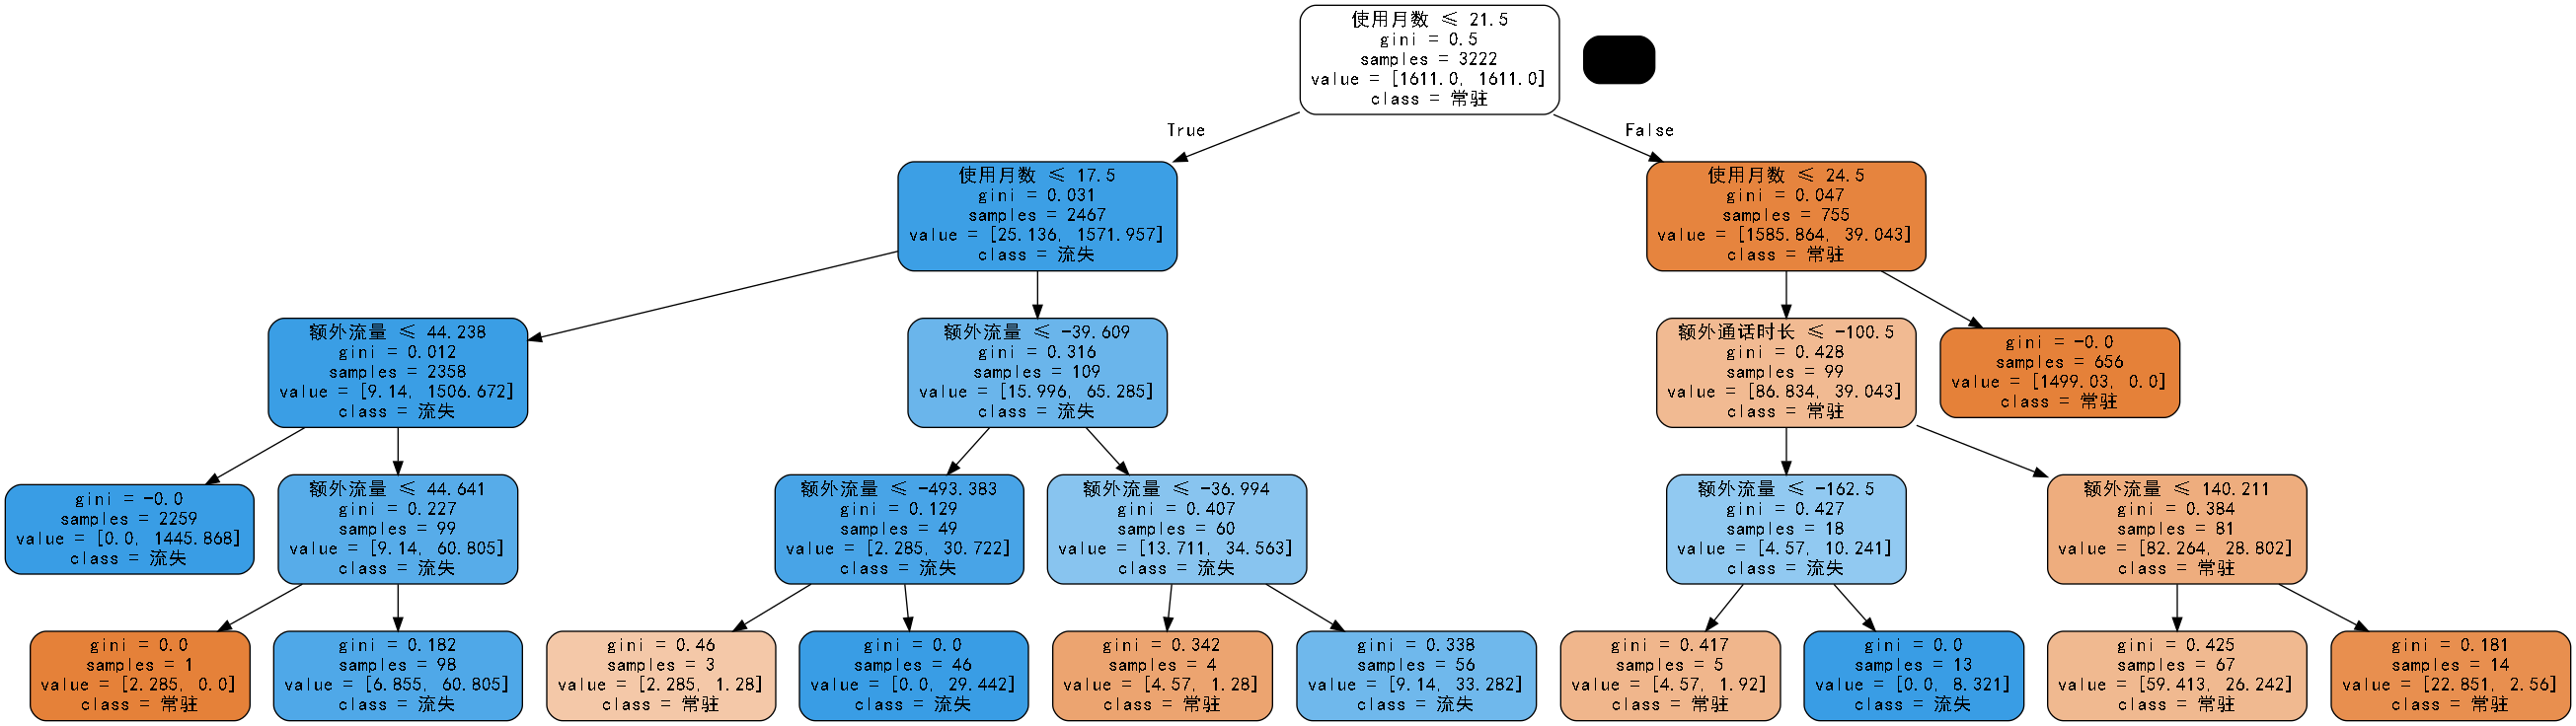

In [129]:
from IPython.display import Image  
from sklearn import tree
import pydotplus 

dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=X.columns.tolist(),  
                         class_names=['常驻', '流失'],  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
for node in graph.get_nodes(): 
    node.set_fontname('SimHei')
Image(graph.create_png())